In [1]:
!conda info


     active environment : env_movie
    active env location : C:\Users\ASUS\anaconda3\envs\env_movie
            shell level : 1
       user config file : C:\Users\ASUS\.condarc
 populated config files : C:\Users\ASUS\.condarc
          conda version : 22.11.1
    conda-build version : 3.22.0
         python version : 3.9.13.final.0
       virtual packages : __archspec=1=x86_64
                          __win=0=0
       base environment : C:\Users\ASUS\anaconda3  (writable)
      conda av data dir : C:\Users\ASUS\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package c

In [2]:
!python --version

Python 3.11.5


# **Proyek Analisis Movie Data**

- Nama : Edy Mochamad Yusud
- Email : edymochamady@gmail.com

# **Menentukan pertanyaan bisnis**

- Cari Title Movie yang memiliki total Runtime lebih besar sama dengan 180 menit
- Tahun berapakah yang memiliki rata-rata voting tertinggi?
- Pada tahun berapa yang memiliki revenue terbanyak?
- Temukan revenue tertinggi pada movie yang popular

# **Import library yang digunakan**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# **Data Wrangling**

## **Gathering data**

In [4]:
df = pd.read_csv('Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# **Assesing Data**

#### **Check data info dan statistik data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [6]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


#### **Check missing value dan duplikasi dataset**

In [7]:
x = df.isnull().values.any()

if x == True:
    print('Terdapat missing value!')
else :
    print('Tidak ada missing value')

Terdapat missing value!


In [8]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [9]:
percent_miss = df.isnull().sum() * 100 / len(df)
percent_miss

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

#### **Cek duplikasi data**

In [10]:
print(f'Jumlah duplikasi data : {df.duplicated().sum()}')

Jumlah duplikasi data : 0


## **Cleaning Data**

In [11]:
df['Revenue (Millions)'].fillna(value = 0, inplace = True)
df['Metascore'].fillna(value = 0, inplace = True)

In [12]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

# **Exploratory Data Analysis (EDA)**

Pertanyaan :
- Cari Title Movie yang memiliki total Runtime lebih besar sama dengan 180 menit
- Tahun berapakah yang memiliki rata-rata voting tertinggi?
- Pada tahun berapa yang memiliki revenue terbanyak?
- Temukan revenue tertinggi pada movie yang popular

#### **Cari Title Movie yang memiliki total Runtime lebih besar sama dengan 180 menit**

In [13]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [14]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

#### **Tahun berapakah yang memiliki rata-rata voting tertinggi?**

In [15]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [16]:
df.groupby('Year')['Votes'].mean().sort_values(ascending = False)

Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

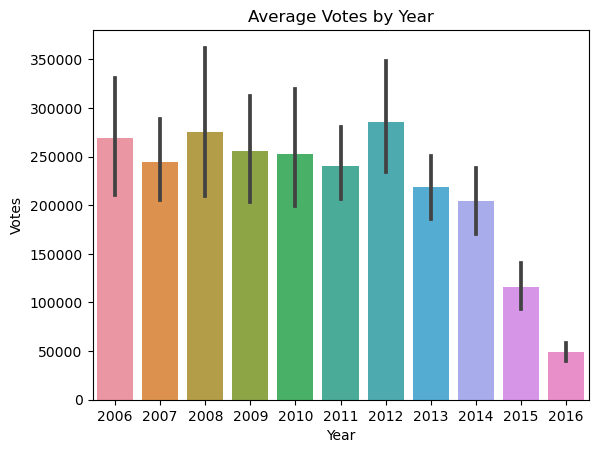

In [17]:
sns.barplot(x = 'Year', y = 'Votes', data = df)
plt.title('Average Votes by Year');

#### **Pada tahun berapa yang memiliki revenue terbanyak?**

In [18]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [19]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False)

Year
2012    107.973281
2009    103.769804
2010     99.827500
2008     97.177308
2011     86.221587
2013     84.249670
2006     82.374091
2014     81.606122
2007     81.249623
2015     69.717480
2016     37.749663
Name: Revenue (Millions), dtype: float64

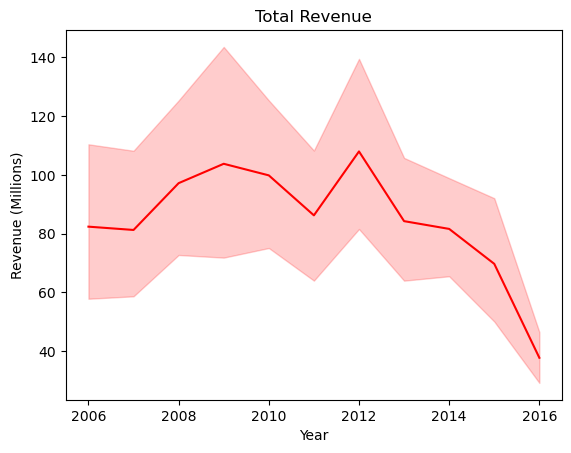

In [20]:
sns.lineplot(x = 'Year', y = 'Revenue (Millions)', data = df, color = 'red')
plt.title('Total Revenue');

#### **Temukan revenue tertinggi pada movie yang popular**

In [21]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [25]:
df[df['Revenue (Millions)'].max() == df['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object